### 문제0. 분석에 사용할 라이브러리를 설치해주세요. 목록은 다음과 같습니다.

pandas, matplotlib.pyplot, seaborn, missingno, numpy, 
tslearn, sklearn, scipy, optuna, lightgbm, math

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import tslearn
import sklearn
import scipy
import optuna
import lightgbm as lgbm
import math
import warnings
warnings.filterwarnings('ignore')

### 문제1. Pandas를 이용해 train, test 데이터를 불러와주세요. 아래 과정은 모두 train 데이터를 사용합니다.


In [5]:
train = pd.read_csv('C:/Users/mrg07/Desktop/train.csv')
test = pd.read_csv('C:/Users/mrg07/Desktop/test.csv')

In [6]:
len(train)

1163340

### 문제2. 아래와 같이 family, date 별 평균을 이용해 데이터 프레임 X를 만들어주세요. (23 x 1124)

- 클러스터링을 할 때는 목표를 명확히 하는 것이 중요합니다. 이번 패키지에서는 sales 패턴이 유사한 family가 있는지 알아보도록 하겠습니다.

In [7]:
X = train.groupby(['family', 'date']).mean().reset_index()
X = X.pivot(index='family', columns='date', values = 'sales')
X

date,2014-07-01,2014-07-02,2014-07-03,2014-07-04,2014-07-05,2014-07-06,2014-07-07,2014-07-08,2014-07-09,2014-07-10,...,2017-07-22,2017-07-23,2017-07-24,2017-07-25,2017-07-26,2017-07-27,2017-07-28,2017-07-29,2017-07-30,2017-07-31
family,,,,,,,,,,,,,,,,,,,,,
AUTOMOTIVE,7.022222,6.311111,5.977778,6.155556,9.866667,11.377778,5.955556,5.422222,5.044444,5.044444,...,9.533333,9.111111,6.622222,6.222222,5.355556,6.711111,6.777778,9.844444,9.444444,6.844444
BEAUTY,3.977778,3.511111,3.244444,3.022222,4.533333,5.622222,3.266667,2.933333,2.377778,2.511111,...,6.555556,8.644444,5.822222,5.000000,4.933333,4.200000,4.533333,7.644444,8.977778,5.377778
BEVERAGES,3264.933333,3206.355556,2671.422222,2737.288889,3867.333333,4465.000000,2873.622222,2455.533333,2496.444444,2278.422222,...,4558.822222,4814.111111,3646.288889,3139.244444,3056.688889,2742.422222,3794.644444,4768.800000,5279.311111,3794.066667
BREAD/BAKERY,458.853911,465.401690,397.371378,399.410444,524.290044,644.477642,474.724889,412.911045,405.710400,376.638178,...,579.353600,669.924578,559.686667,492.958312,488.206467,422.571733,509.985756,611.933578,702.346244,577.136556
CLEANING,1462.644444,1446.688889,1190.022222,1143.933333,1638.066667,1749.355556,1273.066667,1111.044444,1006.622222,1028.511111,...,1413.355556,1550.044444,1258.466667,1034.000000,1127.555556,1402.222222,1542.488889,1890.088889,2133.244444,1672.755556
DAIRY,846.266667,857.644444,691.044444,705.822222,972.955556,1135.888889,793.600000,663.533333,685.755556,601.533333,...,1008.333333,1120.177778,935.711111,779.844444,823.333333,662.422222,812.111111,1032.155556,1146.866667,906.422222
DELI,299.943756,278.401489,255.200467,252.672089,330.293778,387.560645,253.700422,223.562533,215.202178,216.726889,...,346.689756,392.478733,301.634889,268.833089,252.046089,223.869489,343.566511,362.704133,397.362689,320.265311
EGGS,202.511111,198.822222,156.644444,159.311111,223.822222,282.044444,191.800000,160.822222,152.133333,136.222222,...,207.266667,253.066667,262.755556,173.288889,161.822222,145.044444,207.866667,213.622222,251.044444,282.488889
FROZEN FOODS,136.296444,145.426778,124.792534,146.953556,194.742600,181.374200,117.918156,105.328733,113.404600,106.269556,...,199.772022,156.923889,110.305089,103.633400,110.540000,107.995222,160.094111,198.199200,147.237867,112.045800


### 문제 3. 아래 그림과 같이 X 를 이용해 시각화해주세요

### 문제3-1. 데이터 프레임 X를 행 별로 시각화하고 특징을 설명해주세요.

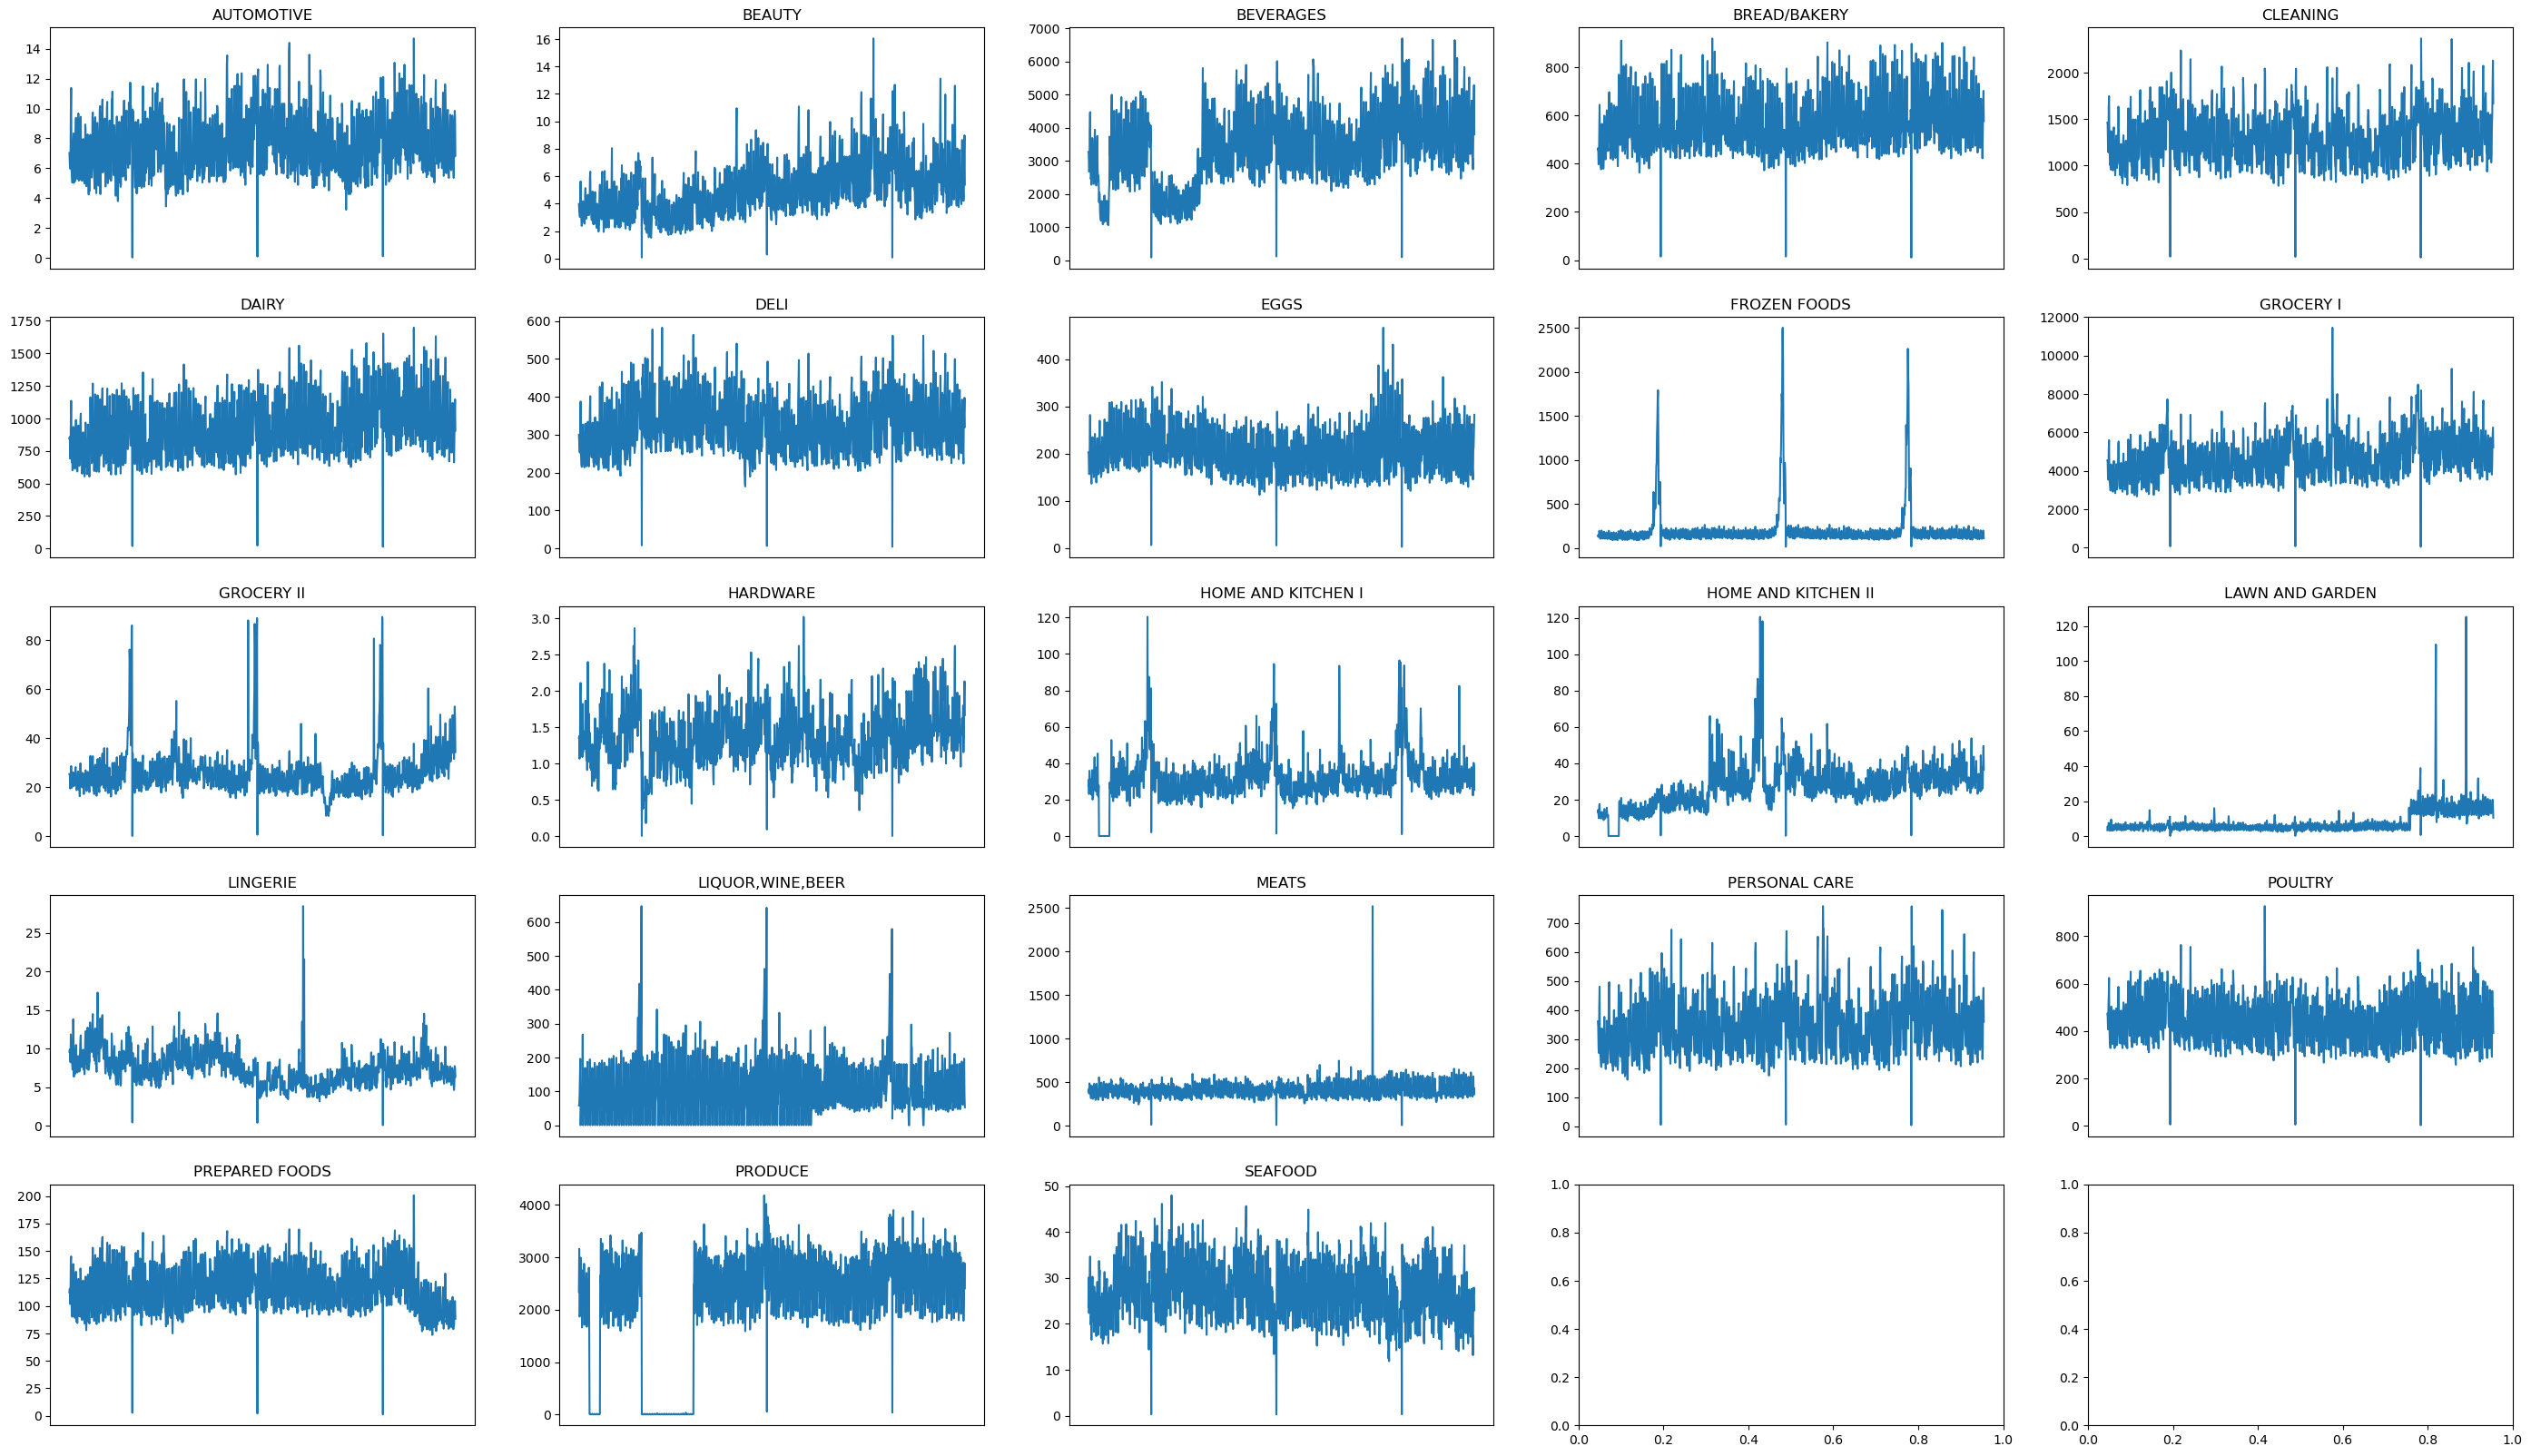

In [5]:
# subplots 생성
fig, axs = plt.subplots(5, 5, figsize=(35, 20))

for i in range(5):
    for j in range(5):
        index = i * 5 + j
        if index < 23:
            axs[i, j].plot(X.iloc[index, :])
            axs[i, j].set_title(X.index[index])
            axs[i, j].set_xticklabels('')
            axs[i, j].xaxis.set_visible(False)


# 레이아웃 조정
# plt.tight_layout()

# 그래프 보여주기
plt.show()

sales가 일정 시점마다 주기를 가지고 튀는 매장이 많다. (예: Frozen Food: 겨울철에 급증)

유행을 타는 것처럼 보이는 family가 있다. (예: Lawn and Garden)

### 문제3-2. 2015-06-01 이후 X 데이터를 시각화해주세요.

앞으로 클러스터링에는 2015-06-01 이후 데이터만을 사용할 것입니다. X를 업데이트해주세요.

In [8]:
X = X.loc[:, X.columns[X.columns >= '2015-06-01']]

In [7]:
X

date,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-06,2015-06-07,2015-06-08,2015-06-09,2015-06-10,...,2017-07-22,2017-07-23,2017-07-24,2017-07-25,2017-07-26,2017-07-27,2017-07-28,2017-07-29,2017-07-30,2017-07-31
family,,,,,,,,,,,,,,,,,,,,,
AUTOMOTIVE,6.822222,6.977778,6.755556,6.266667,5.577778,9.377778,11.111111,6.488889,5.933333,5.200000,...,9.533333,9.111111,6.622222,6.222222,5.355556,6.711111,6.777778,9.844444,9.444444,6.844444
BEAUTY,5.777778,4.711111,4.088889,4.044444,4.088889,6.711111,7.822222,4.111111,4.044444,3.000000,...,6.555556,8.644444,5.822222,5.000000,4.933333,4.200000,4.533333,7.644444,8.977778,5.377778
BEVERAGES,3747.355556,3293.844444,3127.577778,2728.533333,2948.288889,4303.133333,5349.066667,3231.511111,2795.022222,2754.355556,...,4558.822222,4814.111111,3646.288889,3139.244444,3056.688889,2742.422222,3794.644444,4768.800000,5279.311111,3794.066667
BREAD/BAKERY,579.162689,525.409311,534.618424,479.637289,505.908356,649.657022,865.428002,551.708556,483.955889,492.072422,...,579.353600,669.924578,559.686667,492.958312,488.206467,422.571733,509.985756,611.933578,702.346244,577.136556
CLEANING,1519.733333,1433.400000,1354.222222,1115.111111,1177.977778,1596.000000,1832.377778,1233.266667,1090.466667,1049.000000,...,1413.355556,1550.044444,1258.466667,1034.000000,1127.555556,1402.222222,1542.488889,1890.088889,2133.244444,1672.755556
DAIRY,938.000000,844.800000,853.555556,718.066667,782.977778,1060.133333,1295.511111,831.888889,723.800000,752.666667,...,1008.333333,1120.177778,935.711111,779.844444,823.333333,662.422222,812.111111,1032.155556,1146.866667,906.422222
DELI,383.833400,344.523289,316.821244,299.476511,322.240556,411.106333,503.268110,332.981467,294.632645,267.729111,...,346.689756,392.478733,301.634889,268.833089,252.046089,223.869489,343.566511,362.704133,397.362689,320.265311
EGGS,230.600000,198.955556,202.133333,194.822222,174.777778,228.133333,294.733333,202.088889,176.266667,173.688889,...,207.266667,253.066667,262.755556,173.288889,161.822222,145.044444,207.866667,213.622222,251.044444,282.488889
FROZEN FOODS,142.580022,125.355556,133.133600,125.422867,159.271400,229.250911,188.241556,110.744689,110.626022,122.583955,...,199.772022,156.923889,110.305089,103.633400,110.540000,107.995222,160.094111,198.199200,147.237867,112.045800


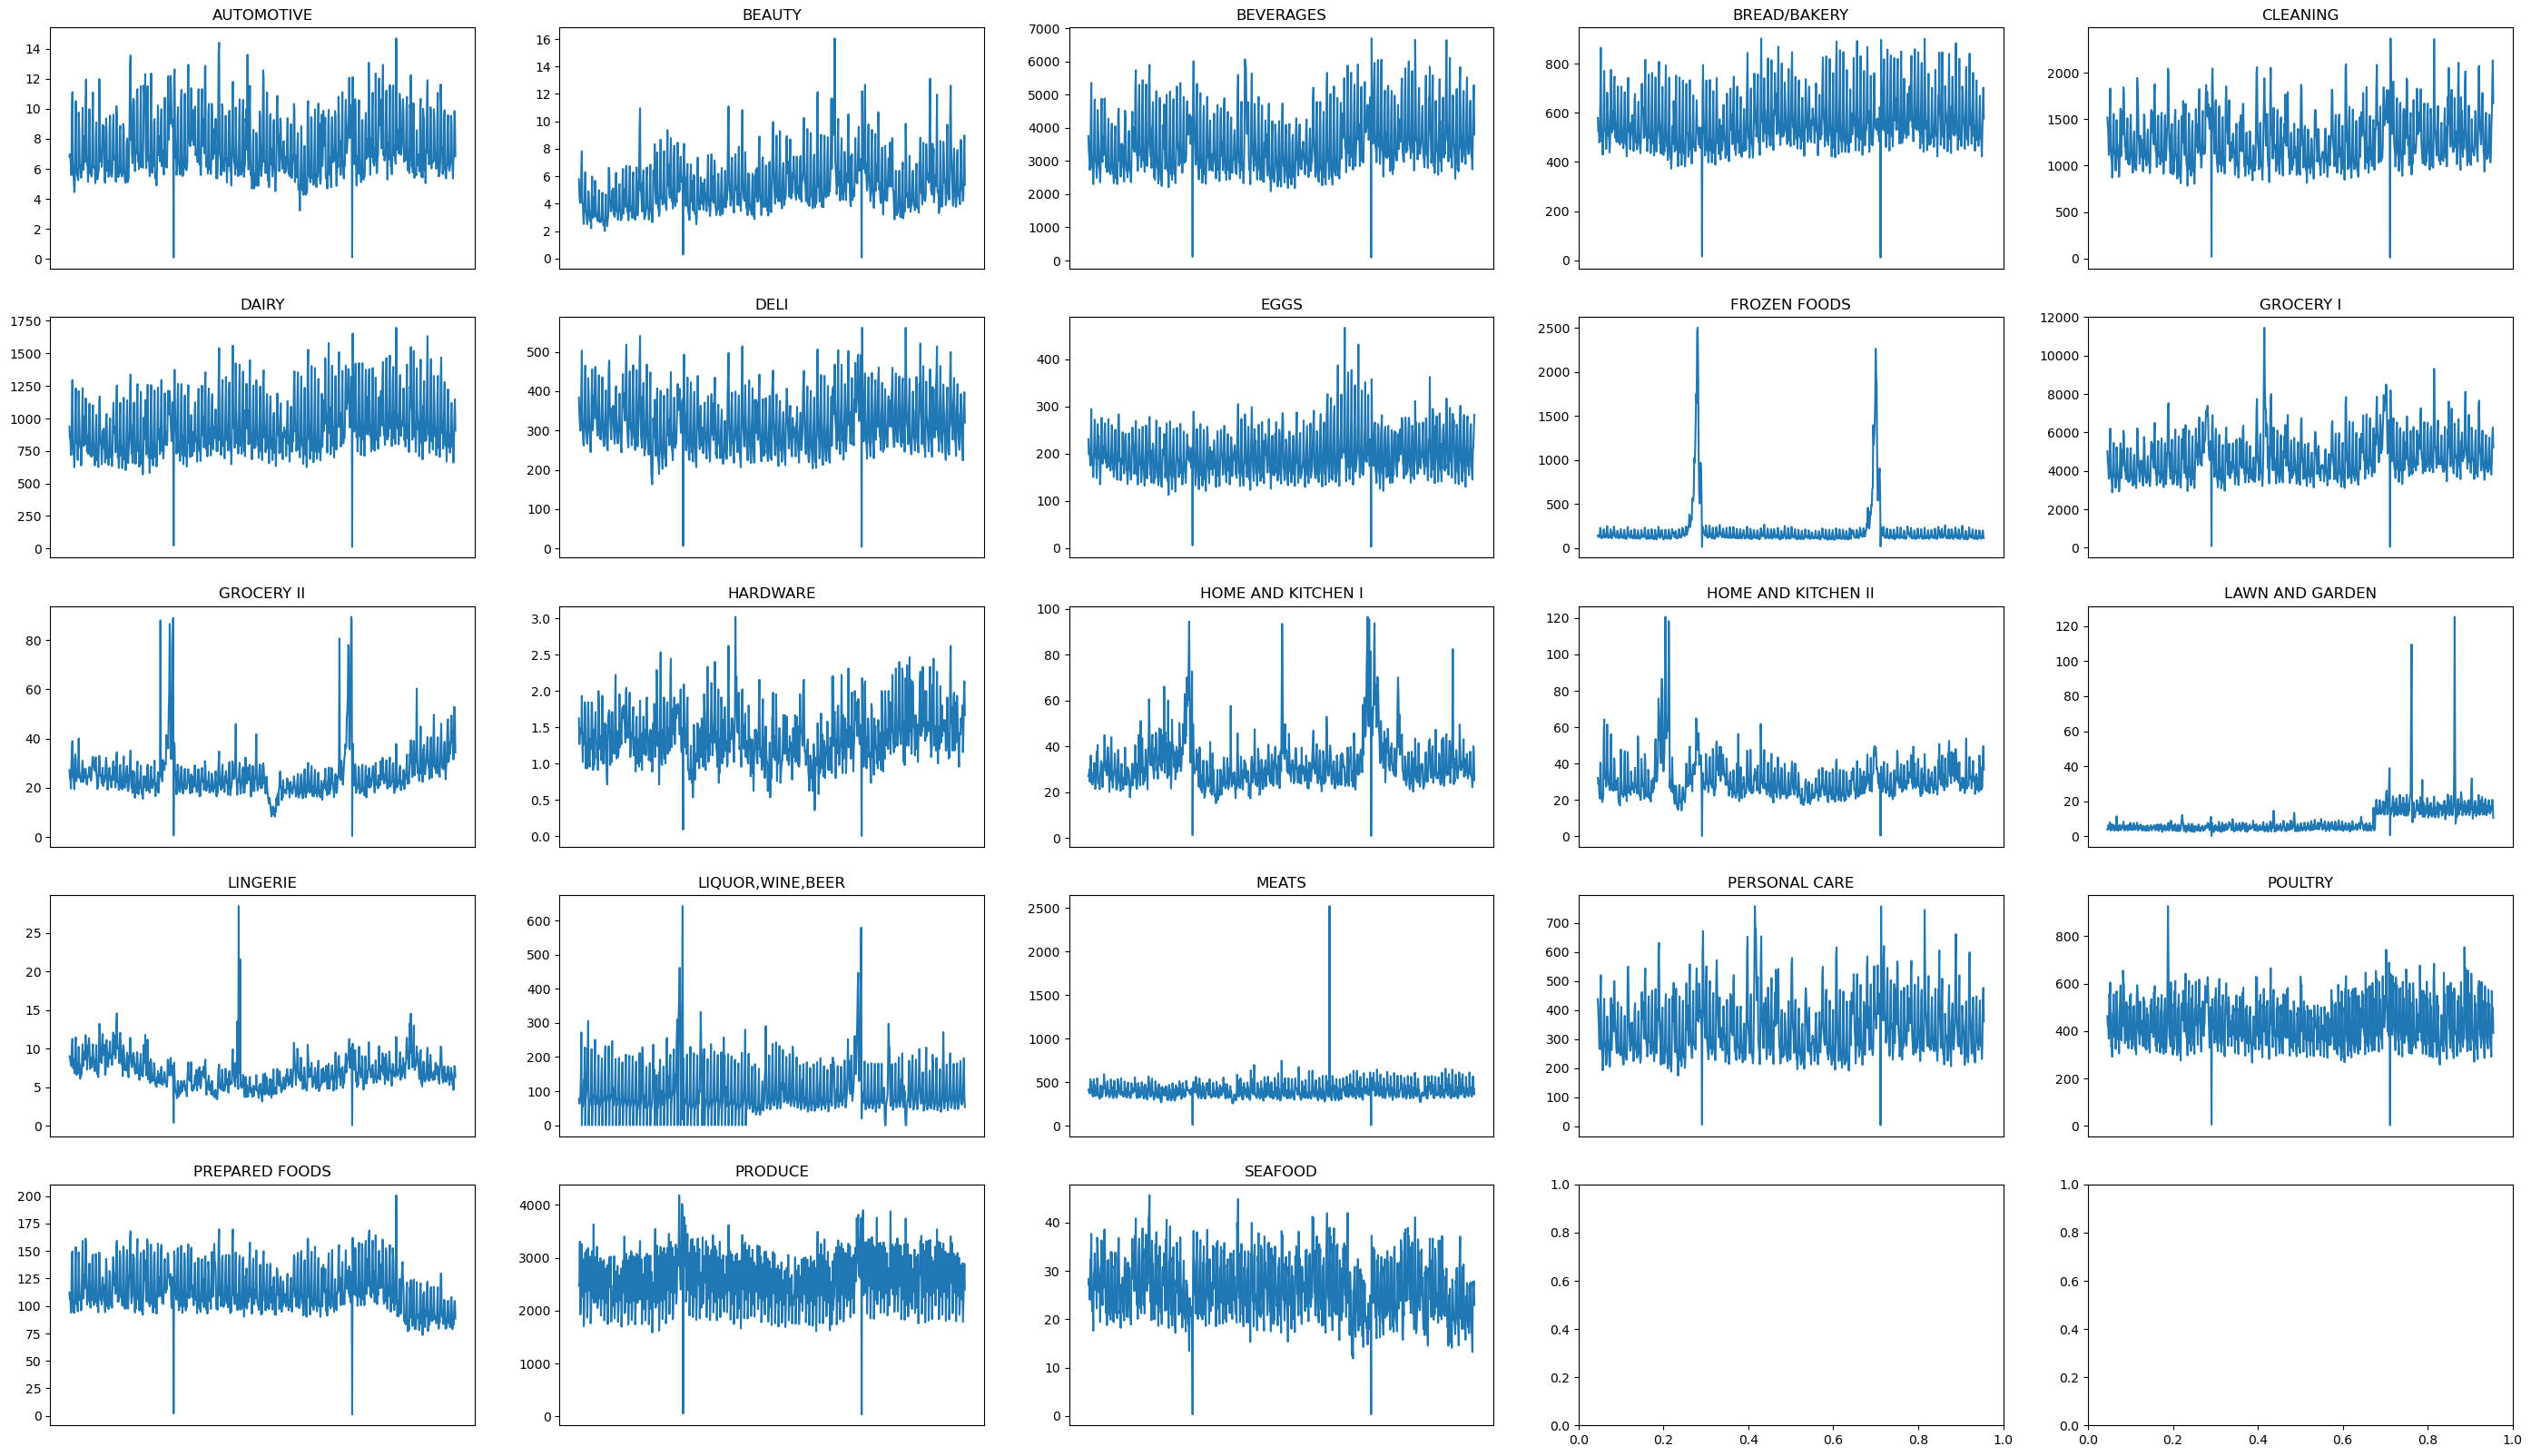

In [8]:
# subplots 생성
fig, axs = plt.subplots(5, 5, figsize=(35, 20))

for i in range(5):
    for j in range(5):
        index = i * 5 + j
        if index < 23:
            axs[i, j].plot(X.iloc[index, :])
            axs[i, j].set_title(X.index[index])
            axs[i, j].set_xticklabels('')
            axs[i, j].xaxis.set_visible(False)


# 레이아웃 조정
# plt.tight_layout()

# 그래프 보여주기
plt.show()

### 문제4. family 별 sales plot을 보면 노이즈가 존재하는 것을 확인할 수 있습니다.
### 노이즈는 클러스터링이나 모델링을 할 때 영향을 주기 때문에 잘 처리해주는 것이 중요합니다.
### 아래 3가지 노이즈 처리 방법에 대해 공부한 후 간단히 비교해주세요.

이동평균법(Moving Average)

지수평활법(Exponential Smoothing)

푸리에 변환

1. 이동평균법 (Moving Average):
이동평균법은 주어진 시계열 데이터에서 일정 기간 동안의 평균값을 계산하여 추세나 패턴을 확인하는 데 사용됩니다.
데이터의 변동을 완화하여 주기적인 변화나 트렌드를 파악하는 데 효과적입니다.
예를 들어, 5일 이동평균은 각 날짜의 5일간의 평균을 계산하여 데이터를 부드럽게 만들어줍니다.

2. 지수평활법 (Exponential Smoothing):
지수평활법은 최근 데이터에 더 많은 가중치를 부여하면서 예측 모델을 만드는 데 사용됩니다.
이전의 예측 값과 오차를 고려하여 최신 데이터에 더 높은 가중치를 주는 방식으로 작동합니다.
지수평활법은 단기적인 예측에 적합하며, 빠르게 변화하는 시계열 데이터를 다룰 때 유용합니다.

3. 푸리에 변환 (Fourier Transform):
푸리에 변환은 주어진 시계열 데이터를 주파수 영역으로 변환하여 주기성이나 주기적인 패턴을 확인하는 데 사용됩니다.
시계열 데이터를 주파수로 분해하여 주기성을 파악하고, 이를 이용하여 주기성을 예측하거나 분석하는 데 이용됩니다.
푸리에 변환은 신호 처리, 통신, 이미지 처리 등 다양한 분야에서 널리 사용됩니다.

이러한 방법들은 각각의 특징과 장단점을 가지고 있습니다. 이동평균법은 주로 데이터의 평활화에 효과적이며, 지수평활법은 최근 데이터에 더 많은 가중치를 주어 빠르게 변화하는 시계열 데이터를 다루는 데 적합합니다. 한편, 푸리에 변환은 시계열 데이터의 주기성을 파악하고 주파수 영역에서 분석하는 데 사용됩니다. 선택하는 방법은 분석하고자 하는 데이터의 특성과 목적에 따라 달라집니다.

### 문제5. 이번 패키지에서는 고속 푸리에 변환(FFT)을 이용해서 노이즈를 처리해보도록 하겠습니다.

FFT는 이산 푸리에 변환과 그 역변환을 빠르게 수행하는 효율적인 알고리즘입니다.

푸리에 변환을 이용한 노이즈 제거는 푸리에 변환한 데이터의 앞뒤 일부만 남기고 나머지를 제거하는
방식으로 진행됩니다. (저주파 신호를 지우고 고주파 신호를 남기는 방식입니다.)

다음의 작업을 할 수 있는 함수 FFT를 만들어주세요. (* FFT(column))

i) np.fft.fft를 이용해 column vector를 푸리에 변환하여 ft로 저장

ii) ft의 처음과 끝 7개를 제외한 나머지 값을 0으로 대체

iii) np.fft.ifft를 이용해 ft를 역 푸리에 변환한 후 실수값(real)만 return

In [9]:
def FFT(column):
    ft = np.fft.fft(column)
    ft[7:-7] = 0
    result = np.fft.ifft(ft).real
    return result

위 FFT 함수를 데이터 프레임 X의 각 행에 사용하여 새로운 데이터 프레임 X_FT를 만들어주세요.

In [10]:
X_FT = X.apply(FFT, axis=1)

In [11]:
# 열별로 FFT하면 pd로 바꿔줘야 함

asdf = []
for i in range(len(X_FT)):
    asdf.append(X_FT[i])

X_FT = pd.DataFrame(asdf, index = X.index, columns = X.columns)

In [12]:
X_FT

date,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-06,2015-06-07,2015-06-08,2015-06-09,2015-06-10,...,2017-07-22,2017-07-23,2017-07-24,2017-07-25,2017-07-26,2017-07-27,2017-07-28,2017-07-29,2017-07-30,2017-07-31
family,,,,,,,,,,,,,,,,,,,,,
AUTOMOTIVE,7.261987,7.259227,7.256140,7.252724,7.248979,7.244904,7.240503,7.235776,7.230728,7.225362,...,7.272652,7.272858,7.272807,7.272488,7.271890,7.271003,7.269821,7.268334,7.266536,7.264422
BEAUTY,4.825176,4.774759,4.724722,4.675127,4.626039,4.577517,4.529622,4.482410,4.435938,4.390261,...,5.335464,5.284968,5.234168,5.183133,5.131934,5.080640,5.029322,4.978048,4.926887,4.875907
BEVERAGES,3587.159758,3575.651103,3564.012919,3552.262298,3540.416828,3528.494549,3516.513909,3504.493723,3492.453127,3480.411527,...,3691.787702,3682.380189,3672.707067,3662.778653,3652.606059,3642.201174,3631.576640,3620.745826,3609.722806,3598.522322
BREAD/BAKERY,565.693247,565.077141,564.462546,563.850339,563.241395,562.636581,562.036758,561.442774,560.855468,560.275664,...,571.744625,571.161386,570.571037,569.974397,569.372303,568.765600,568.155148,567.541811,566.926463,566.309981
CLEANING,1305.856905,1303.589574,1301.323727,1299.062391,1296.808617,1294.565469,1292.336018,1290.123339,1287.930498,1285.760547,...,1327.973069,1325.848453,1323.697512,1321.522747,1319.326732,1317.112113,1314.881602,1312.637971,1310.384050,1308.122719
DAIRY,902.973293,901.326685,899.695272,898.079420,896.479495,894.895856,893.328858,891.778853,890.246187,888.731202,...,920.190760,918.413490,916.647467,914.893111,913.150834,911.421046,909.704147,908.000533,906.310596,904.634722
DELI,332.009187,332.038448,332.065378,332.090233,332.113287,332.134830,332.155173,332.174639,332.193566,332.212305,...,331.547774,331.609545,331.667663,331.722155,331.773067,331.820473,331.864472,331.905185,331.942759,331.977362
EGGS,207.454262,207.359843,207.261672,207.159776,207.054186,206.944939,206.832082,206.715666,206.595750,206.472396,...,208.192172,208.134942,208.074135,208.009699,207.941588,207.869767,207.794207,207.714885,207.631790,207.544915
FROZEN FOODS,117.417313,118.156802,118.956698,119.815859,120.733040,121.706892,122.735966,123.818707,124.953460,126.138463,...,113.524443,113.619048,113.779998,114.007142,114.300230,114.658915,115.082754,115.571204,116.123623,116.739273


문제3처럼 X_FT를 시각화해주세요.

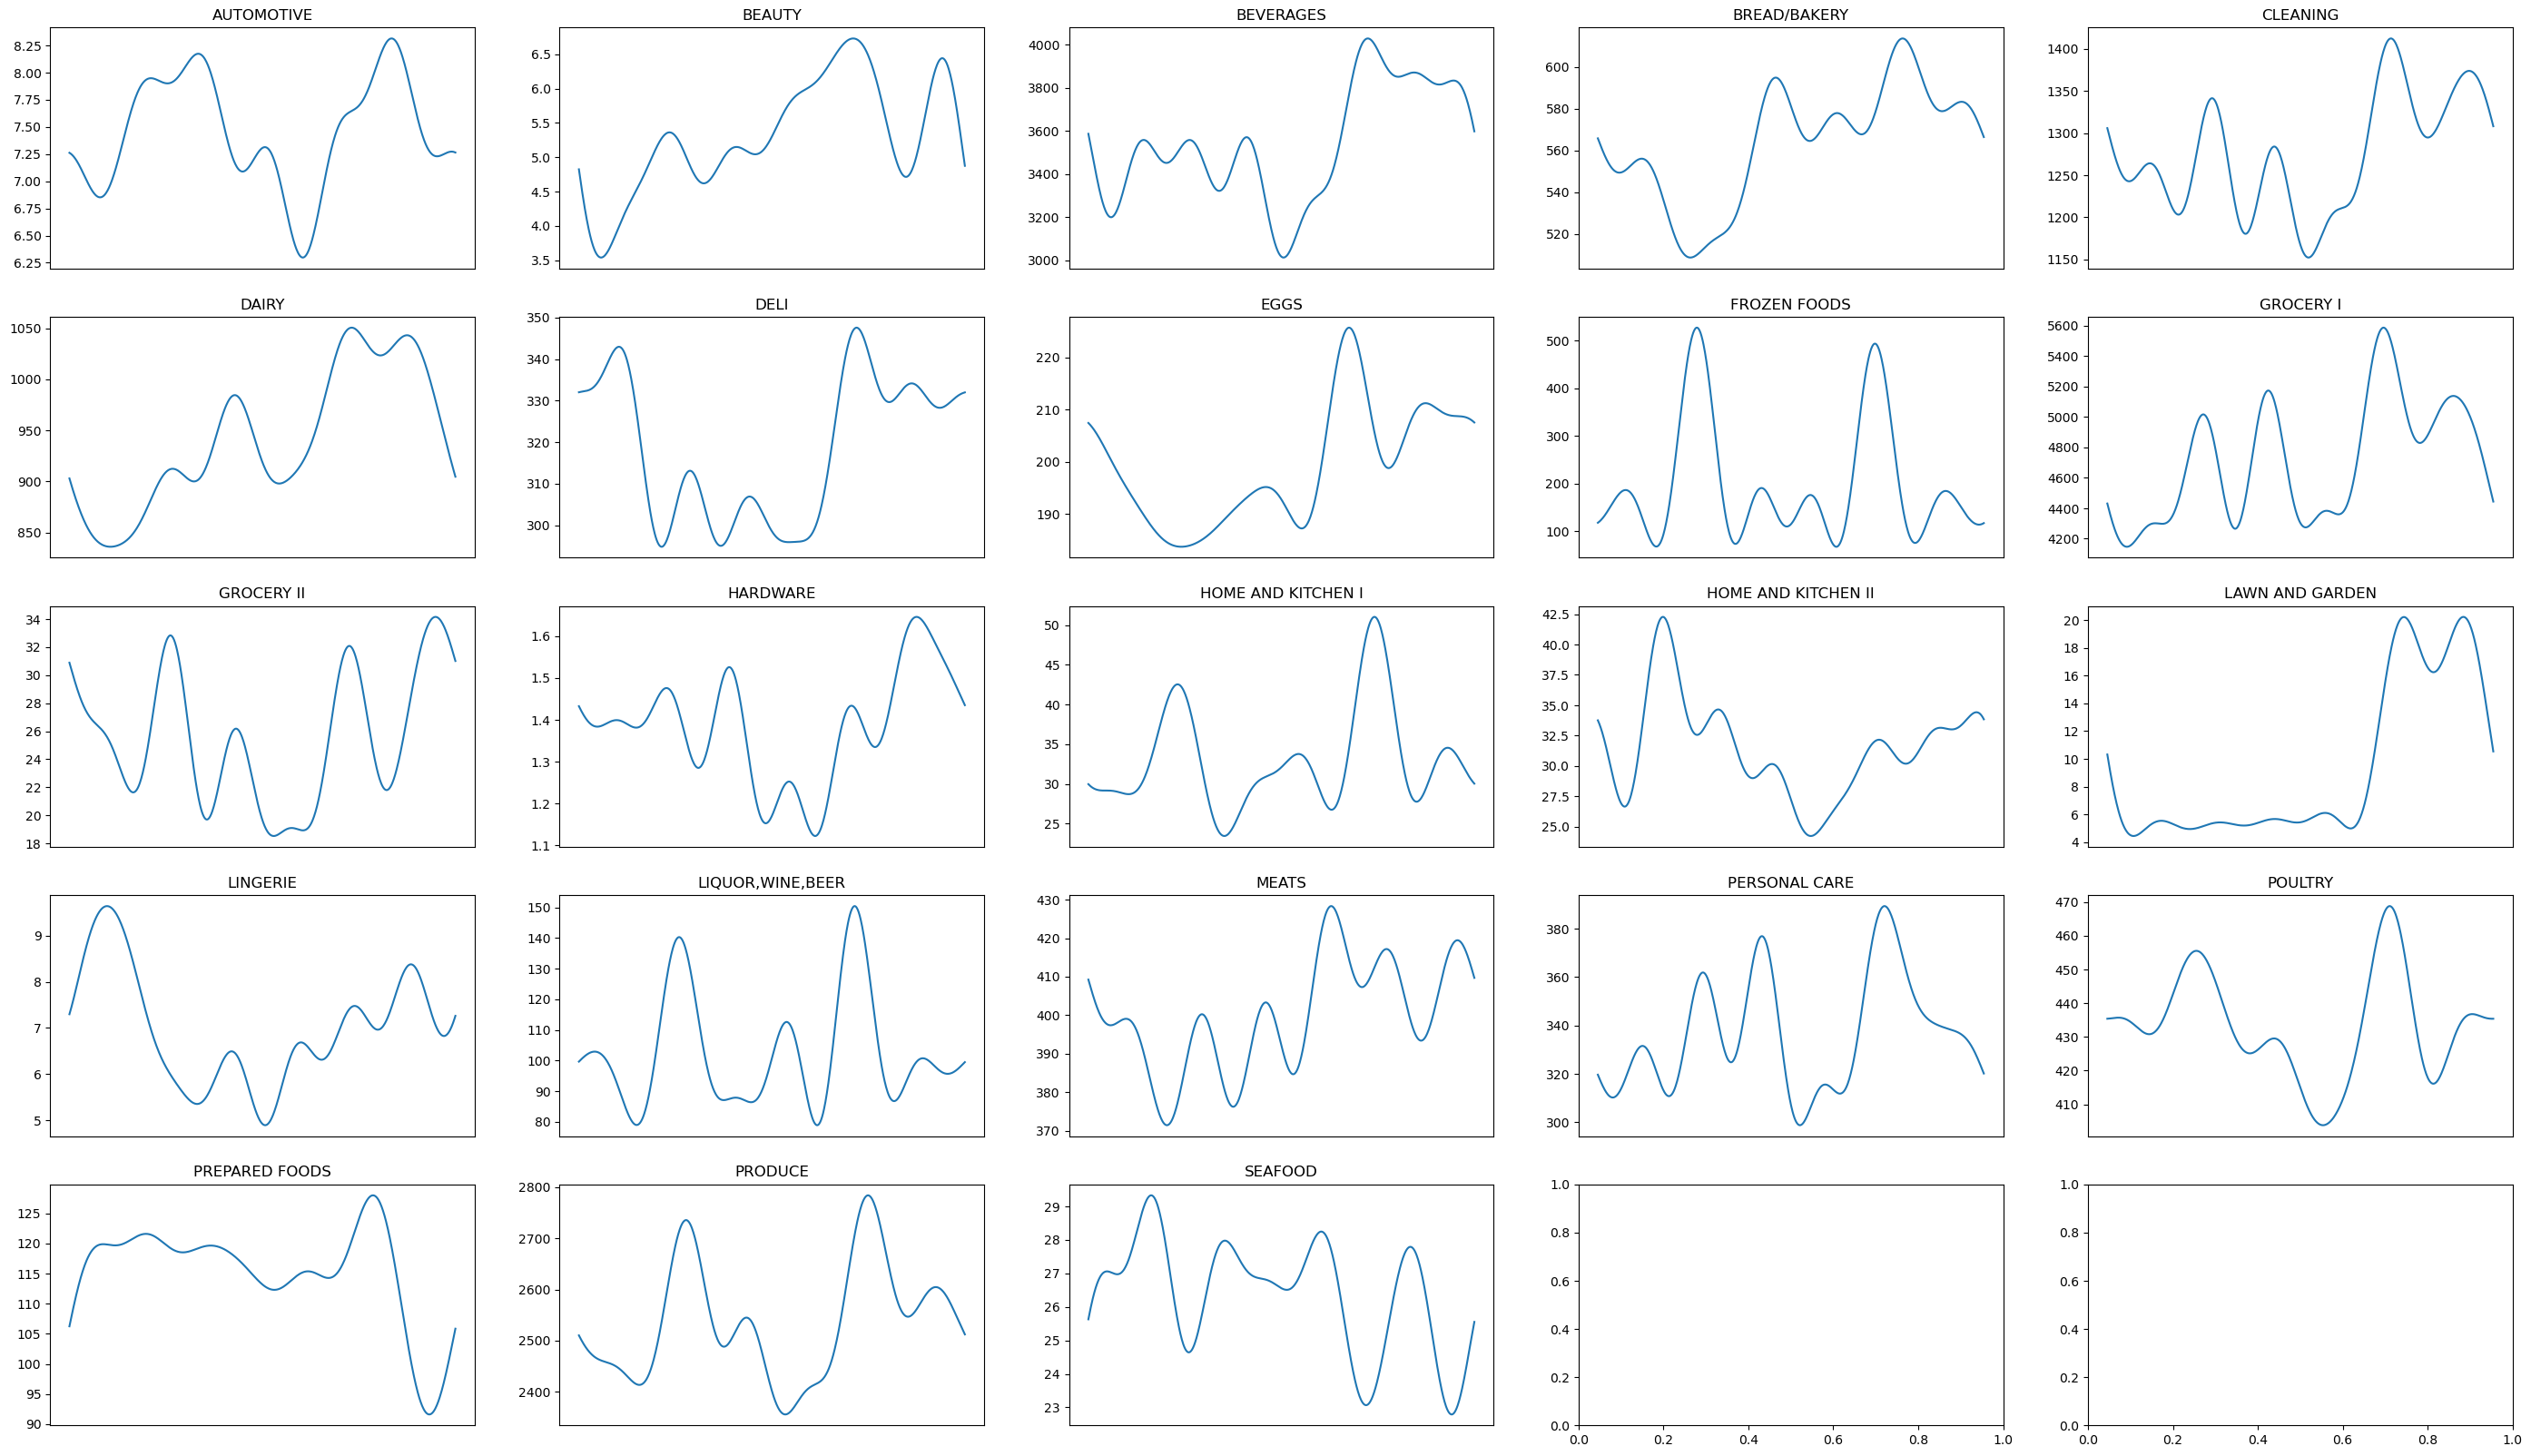

In [13]:
# subplots 생성
fig, axs = plt.subplots(5, 5, figsize=(35, 20))

for i in range(5):
    for j in range(5):
        index = i * 5 + j
        if index < 23:
            axs[i, j].plot(X_FT.iloc[index, :])
            axs[i, j].set_title(X_FT.index[index])
            axs[i, j].set_xticklabels('')
            axs[i, j].xaxis.set_visible(False)
            
            
plt.show()

### 문제6. 문제5의 plot을 기반으로 클러스터링을 수행하기 전 스케일링이 필요한지 간단히 설명해주세요.

Family type에 따라 scale이 천차만별인데 유클리디안 거리 기반 클러스터링을 해야 하니 스케일링이 필요합니다.

### 문제7. X_FT에 표준화를 진행해서 새로운 데이터 프레임 X_norm을 만들어주세요.

In [13]:
# FFT함수를 행별로 적용했으므로 scaling도 행별로 진행

from sklearn.preprocessing import scale
X_norm = pd.DataFrame(scale(X_FT, axis = 1), index = X_FT.index, columns = X_FT.columns)
X_norm

date,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-06,2015-06-07,2015-06-08,2015-06-09,2015-06-10,...,2017-07-22,2017-07-23,2017-07-24,2017-07-25,2017-07-26,2017-07-27,2017-07-28,2017-07-29,2017-07-30,2017-07-31
family,,,,,,,,,,,,,,,,,,,,,
AUTOMOTIVE,-0.376684,-0.382102,-0.388162,-0.394868,-0.402220,-0.410219,-0.418860,-0.428139,-0.438049,-0.448582,...,-0.355747,-0.355342,-0.355443,-0.356070,-0.357244,-0.358983,-0.361305,-0.364224,-0.367753,-0.371904
BEAUTY,-0.576834,-0.638268,-0.699239,-0.759671,-0.819486,-0.878610,-0.936972,-0.994500,-1.051127,-1.106786,...,0.044961,-0.016568,-0.078469,-0.140656,-0.203044,-0.265546,-0.328079,-0.390557,-0.452897,-0.515017
BEVERAGES,0.177968,0.134894,0.091335,0.047355,0.003020,-0.041602,-0.086442,-0.131431,-0.176496,-0.221565,...,0.569564,0.534354,0.498150,0.460990,0.422917,0.383974,0.344209,0.303672,0.262415,0.220495
BREAD/BAKERY,0.082967,0.060874,0.038836,0.016883,-0.004953,-0.026641,-0.048150,-0.069449,-0.090509,-0.111300,...,0.299962,0.279047,0.257878,0.236484,0.214893,0.193138,0.171248,0.149254,0.127189,0.105082
CLEANING,0.471831,0.438073,0.404337,0.370668,0.337112,0.303714,0.270520,0.237576,0.204927,0.172619,...,0.801115,0.769482,0.737457,0.705077,0.672381,0.639408,0.606198,0.572793,0.539235,0.505566
DAIRY,-0.575868,-0.600541,-0.624986,-0.649198,-0.673171,-0.696900,-0.720380,-0.743605,-0.766571,-0.789271,...,-0.317881,-0.344512,-0.370974,-0.397261,-0.423368,-0.449287,-0.475013,-0.500540,-0.525862,-0.550973
DELI,0.784420,0.786117,0.787679,0.789120,0.790457,0.791706,0.792886,0.794014,0.795112,0.796198,...,0.757665,0.761247,0.764617,0.767777,0.770729,0.773478,0.776029,0.778390,0.780569,0.782575
EGGS,0.766903,0.758501,0.749766,0.740699,0.731303,0.721582,0.711539,0.701180,0.690510,0.679533,...,0.832565,0.827472,0.822062,0.816328,0.810267,0.803876,0.797153,0.790094,0.782700,0.774970
FROZEN FOODS,-0.636498,-0.630579,-0.624177,-0.617301,-0.609960,-0.602166,-0.593930,-0.585264,-0.576182,-0.566698,...,-0.667654,-0.666897,-0.665609,-0.663791,-0.661445,-0.658574,-0.655182,-0.651273,-0.646852,-0.641924


### 문제8. 다양한 클러스터링 방법이 있지만 이번 패키지에서는 K-Means Clustering을 진행하겠습니다.

### Dynamic Time Warping(DTW)이 무엇인지 찾아본 후 Euclidean Distance를 사용했을 때와 비교하여
### 어떤 특징이 있는지, 또한 우리 데이터에 무엇이 더 적합할지 간단히 설명해주세요.

Dynamic Time Warping (DTW)은 두 시계열 데이터 간의 유사성을 비교하는 방법 중 하나로, 서로 다른 길이를 가진 두 시계열 데이터 간의 유사성을 측정하는 데 사용됩니다. 이 방법은 시간 축이나 길이에 따른 차이를 보상하여 두 시계열 데이터 간의 거리를 계산합니다. DTW는 신호 처리, 음성 인식, 자연어 처리, 동작 인식 등 다양한 분야에서 활발하게 사용됩니다.

DTW는 두 개의 시계열 데이터 포인트 간의 거리를 측정할 때 Euclidean Distance와는 다르게 유사성을 비교합니다. 이를 통해 DTW는 두 시계열 데이터 간의 유사성을 평가할 때 시간적인 차이를 보상하여 비교합니다. 이러한 특성으로 인해 DTW는 시간적인 변형이나 차이를 고려하는 데 효과적이며, 다른 방법들보다 더 유연한 비교를 가능케 합니다.

비교적으로, Euclidean Distance는 두 점 사이의 직선 거리를 측정하는 데 사용됩니다. 그러나 이 방법은 시간적 변형이나 차이를 고려하지 않으며, 두 시계열 데이터가 동일한 길이를 가져야만 비교할 수 있습니다. 따라서 시계열 데이터 간의 시간적 변형이나 차이를 고려해야 하는 경우에는 DTW가 더 적합한 방법일 수 있습니다. DTW는 이러한 시계열 데이터 간의 비교를 위해 유연성과 강인한 성능을 제공하여 다양한 분야에서 활용됩니다. 우리 데이터는 시계열 자료이므로 DTW를 사용하여 시계열 클러스터링을 진행하는 게 더 적합합니다.

### 문제9. X_norm에 DTW를 이용한 K-Means Clustering을 진행해주세요.

In [14]:
from tslearn.clustering import TimeSeriesKMeans

km = TimeSeriesKMeans(n_clusters=3, random_state=42, n_jobs=-1, metric='dtw')
y_km = pd.DataFrame(km.fit_predict(X_norm), index = X_norm.index, columns = ['cluster_label'])

### 문제10. 문제9의 클러스터링 결과를 이용해 X_norm을 다음과 같이 시각화해주세요.

In [15]:
# X_norm에 클러스터 라벨 결합
X_norm = pd.concat([X_norm, y_km], axis = 1)

In [16]:
X_norm

,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-06,2015-06-07,2015-06-08,2015-06-09,2015-06-10,...,2017-07-23,2017-07-24,2017-07-25,2017-07-26,2017-07-27,2017-07-28,2017-07-29,2017-07-30,2017-07-31,cluster_label
family,,,,,,,,,,,,,,,,,,,,,
AUTOMOTIVE,-0.376684,-0.382102,-0.388162,-0.394868,-0.402220,-0.410219,-0.418860,-0.428139,-0.438049,-0.448582,...,-0.355342,-0.355443,-0.356070,-0.357244,-0.358983,-0.361305,-0.364224,-0.367753,-0.371904,2
BEAUTY,-0.576834,-0.638268,-0.699239,-0.759671,-0.819486,-0.878610,-0.936972,-0.994500,-1.051127,-1.106786,...,-0.016568,-0.078469,-0.140656,-0.203044,-0.265546,-0.328079,-0.390557,-0.452897,-0.515017,1
BEVERAGES,0.177968,0.134894,0.091335,0.047355,0.003020,-0.041602,-0.086442,-0.131431,-0.176496,-0.221565,...,0.534354,0.498150,0.460990,0.422917,0.383974,0.344209,0.303672,0.262415,0.220495,1
BREAD/BAKERY,0.082967,0.060874,0.038836,0.016883,-0.004953,-0.026641,-0.048150,-0.069449,-0.090509,-0.111300,...,0.279047,0.257878,0.236484,0.214893,0.193138,0.171248,0.149254,0.127189,0.105082,1
CLEANING,0.471831,0.438073,0.404337,0.370668,0.337112,0.303714,0.270520,0.237576,0.204927,0.172619,...,0.769482,0.737457,0.705077,0.672381,0.639408,0.606198,0.572793,0.539235,0.505566,0
DAIRY,-0.575868,-0.600541,-0.624986,-0.649198,-0.673171,-0.696900,-0.720380,-0.743605,-0.766571,-0.789271,...,-0.344512,-0.370974,-0.397261,-0.423368,-0.449287,-0.475013,-0.500540,-0.525862,-0.550973,1
DELI,0.784420,0.786117,0.787679,0.789120,0.790457,0.791706,0.792886,0.794014,0.795112,0.796198,...,0.761247,0.764617,0.767777,0.770729,0.773478,0.776029,0.778390,0.780569,0.782575,0
EGGS,0.766903,0.758501,0.749766,0.740699,0.731303,0.721582,0.711539,0.701180,0.690510,0.679533,...,0.827472,0.822062,0.816328,0.810267,0.803876,0.797153,0.790094,0.782700,0.774970,0
FROZEN FOODS,-0.636498,-0.630579,-0.624177,-0.617301,-0.609960,-0.602166,-0.593930,-0.585264,-0.576182,-0.566698,...,-0.666897,-0.665609,-0.663791,-0.661445,-0.658574,-0.655182,-0.651273,-0.646852,-0.641924,2


In [17]:
cl0 = X_norm[X_norm['cluster_label'] == 0].drop('cluster_label', axis = 1)
cl1 = X_norm[X_norm['cluster_label'] == 1].drop('cluster_label', axis = 1)
cl2 = X_norm[X_norm['cluster_label'] == 2].drop('cluster_label', axis = 1)

In [18]:
cl0

,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-06,2015-06-07,2015-06-08,2015-06-09,2015-06-10,...,2017-07-22,2017-07-23,2017-07-24,2017-07-25,2017-07-26,2017-07-27,2017-07-28,2017-07-29,2017-07-30,2017-07-31
family,,,,,,,,,,,,,,,,,,,,,
CLEANING,0.471831,0.438073,0.404337,0.370668,0.337112,0.303714,0.270520,0.237576,0.204927,0.172619,...,0.801115,0.769482,0.737457,0.705077,0.672381,0.639408,0.606198,0.572793,0.539235,0.505566
DELI,0.784420,0.786117,0.787679,0.789120,0.790457,0.791706,0.792886,0.794014,0.795112,0.796198,...,0.757665,0.761247,0.764617,0.767777,0.770729,0.773478,0.776029,0.778390,0.780569,0.782575
EGGS,0.766903,0.758501,0.749766,0.740699,0.731303,0.721582,0.711539,0.701180,0.690510,0.679533,...,0.832565,0.827472,0.822062,0.816328,0.810267,0.803876,0.797153,0.790094,0.782700,0.774970
GROCERY II,1.153763,1.127259,1.100761,1.074301,1.047911,1.021623,0.995467,0.969473,0.943670,0.918088,...,1.411829,1.387095,1.362034,1.336678,1.311061,1.285217,1.259180,1.232982,1.206658,1.180240
HARDWARE,0.364503,0.346265,0.328294,0.310609,0.293232,0.276183,0.259481,0.243147,0.227200,0.211658,...,0.557107,0.537300,0.517566,0.497921,0.478384,0.458974,0.439710,0.420611,0.401696,0.382987
HOME AND KITCHEN II,0.598783,0.576090,0.551937,0.526339,0.499314,0.470885,0.441080,0.409931,0.377474,0.343750,...,0.745277,0.737053,0.727452,0.716448,0.704020,0.690149,0.674821,0.658025,0.639754,0.620007
LINGERIE,0.251999,0.281625,0.312030,0.343169,0.375000,0.407478,0.440559,0.474198,0.508350,0.542969,...,0.007361,0.027044,0.047881,0.069840,0.092887,0.116988,0.142107,0.168207,0.195249,0.223193
MEATS,0.681339,0.649758,0.618229,0.586804,0.555536,0.524475,0.493672,0.463175,0.433033,0.403292,...,0.987940,0.958865,0.929290,0.899270,0.868859,0.838115,0.807094,0.775849,0.744439,0.712917


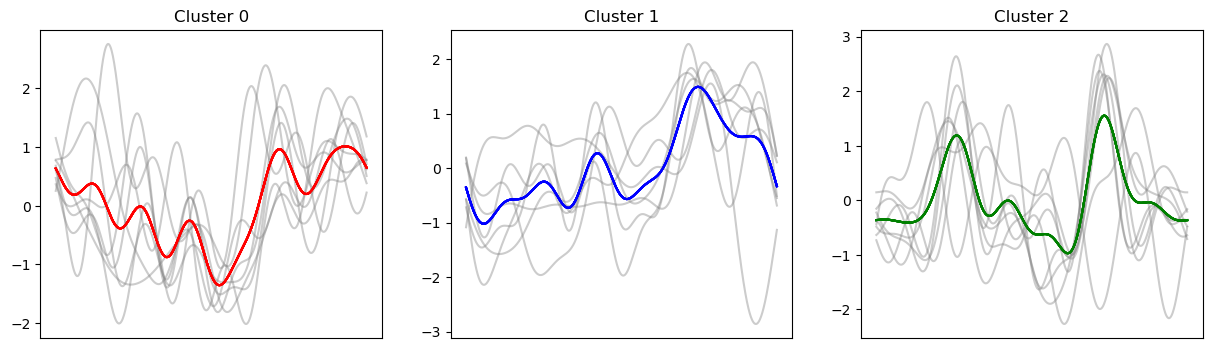

In [19]:
# 각 클러스터에 대한 데이터 시각화
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for j in range(len(cl0)):
    axs[0].plot(cl0.iloc[j,:], color = 'gray', alpha = 0.4)
    cl0_mean = cl0.mean()
    axs[0].plot(cl0_mean, color = 'red')
    axs[0].set_title('Cluster 0')
    axs[0].xaxis.set_visible(False)
    # axs[0].set_ylim(-3, 3)

for j in range(len(cl1)):
    axs[1].plot(cl1.iloc[j,:], color = 'gray', alpha = 0.4)
    cl1_mean = cl1.mean()
    axs[1].plot(cl1_mean, color = 'blue')
    axs[1].set_title('Cluster 1')
    axs[1].xaxis.set_visible(False)

for j in range(len(cl2)):
    axs[2].plot(cl2.iloc[j,:], color = 'gray', alpha = 0.4)
    cl2_mean = cl2.mean()
    axs[2].plot(cl2_mean, color = 'green')
    axs[2].set_title('Cluster 2')
    axs[2].set_xticklabels('')
    axs[2].xaxis.set_visible(False)
    
# 시각화 설정

plt.show()

# Chapter 2 : Modeling & Prediction

### 문제1. Chapter1 문제9에서 구한 클러스터 0을 대상으로만 예측을 진행하려고 합니다. 클러스터 0에 해당되는 데이터만 뽑아 train과 test를 업데이트해주세요

In [24]:
# cl0 = X_norm[X_norm['cluster_label'] == 0].drop('cluster_label', axis = 1)
# cl0
train = pd.read_csv('C:/Users/mrg07/Desktop/train.csv')
test = pd.read_csv('C:/Users/mrg07/Desktop/test.csv')

train = train[train['family'].isin(['CLEANING', 'DELI', 'EGGS', 'GROCERY II', 'HARDWARE', 'HOME AND KITCHEN II', 'LINGERIE', 'MEATS'])]
test = test[test['family'].isin(['CLEANING', 'DELI', 'EGGS', 'GROCERY II', 'HARDWARE', 'HOME AND KITCHEN II', 'LINGERIE', 'MEATS'])]

In [25]:
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

문제2. train과 test의 범주형 변수들에 대해 LabelEncoding을 진행하세요.

In [26]:
test.info()

# 범주형변수: family, city, state

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         5400 non-null   object 
 1   store_nbr    5400 non-null   int64  
 2   family       5400 non-null   object 
 3   sales        5400 non-null   float64
 4   onpromotion  5400 non-null   int64  
 5   city         5400 non-null   object 
 6   state        5400 non-null   object 
 7   holiday      5400 non-null   int64  
 8   year         5400 non-null   int64  
 9   month        5400 non-null   int64  
 10  weekday      5400 non-null   int64  
 11  dcoilwtico   5400 non-null   float64
dtypes: float64(2), int64(6), object(4)
memory usage: 506.4+ KB


In [27]:
encoder1 = sklearn.preprocessing.LabelEncoder()
train['family'] = encoder1.fit_transform(train['family'])
test['family'] = encoder1.transform(test['family'])

encoder2 = sklearn.preprocessing.LabelEncoder()
train['city'] = encoder2.fit_transform(train['city'])
test['city'] = encoder2.transform(test['city'])

encoder3 = sklearn.preprocessing.LabelEncoder()
train['state'] = encoder3.fit_transform(train['state'])
test['state'] = encoder3.transform(test['state'])

### 문제3. LightGBM이 어떤 모델이고 어떤 하이퍼 파라미터가 사용되는지 간단하게 설명해주세요.

LightGBM은 Microsoft에서 개발한 분산 그래디언트 부스팅 프레임워크로, 일반적으로 사용되는 트리 기반 학습 알고리즘 중 하나입니다. LightGBM은 고성능, 확장성, 효율성을 갖추고 있어 대용량 데이터셋에 대해 빠른 학습과 예측을 가능하게 합니다. 이를 위해 LightGBM은 다양한 최적화 기법을 사용하여 메모리 사용량을 줄이고 학습 속도를 향상시킵니다.

LightGBM의 주요 하이퍼 파라미터에는 다음과 같은 것들이 있습니다:

- num_leaves: 트리의 최대 잎(리프) 수
- learning_rate: 각 이터레이션에서 모델 파라미터를 조정하는 데 사용되는 스케일링 비율
- max_depth: 트리의 최대 깊이
- min_data_in_leaf: 리프 노드가 가져야 하는 최소 데이터 포인트 수
- feature_fraction: 각 트리에서 사용되는 피처의 비율
- bagging_fraction: 각 트리에 사용되는 데이터 샘플의 비율
- lambda_l1 및 lambda_l2: L1 및 L2 정규화를 위한 가중치 값

이외에도 LightGBM은 다양한 하이퍼 파라미터를 제공하여 모델을 조정하고, 과적합을 방지하며, 성능을 최적화할 수 있습니다.주어진 데이터셋 및 문제에 가장 적합한 하이퍼 파라미터를 찾기 위해서는 교차 검증과 그리드 서치와 같은 테크닉을 사용하여 모델을 튜닝해야 합니다.

### 문제4. 하이퍼 파라미터 튜닝에 사용할 Optuna가 무엇인지 다른 방법과 비교하여 간단하게 설명해주세요.

Optuna는 하이퍼 파라미터 최적화를 위한 오픈 소스 하이퍼 파라미터 튜닝 프레임워크입니다. Optuna는 베이지안 최적화 알고리즘을 기반으로하여 매개 변수 공간을 탐색하고, 목표 함수를 최소화 또는 최대화하는 최적의 하이퍼 파라미터 조합을 찾습니다. Optuna는 분산 환경에서 사용할 수 있으며, 간단한 인터페이스를 통해 사용자가 목적 함수를 정의하고 하이퍼 파라미터 탐색을 수행할 수 있도록 도와줍니다.

다른 하이퍼 파라미터 튜닝 방법과 비교하면, Optuna는 베이지안 최적화를 기반으로 하여 다양한 하이퍼 파라미터 조합을 자동으로 탐색할 수 있습니다. 이는 gridsearch나 randomsearch보다 효율적으로 최적의 매개 변수를 찾을 수 있도록 도와줍니다. 또한, Optuna는 대규모 분산 시스템에서도 사용할 수 있어 병렬 탐색이 가능하며, 다양한 종류의 기계 학습 모델에 대한 튜닝을 지원합니다.

Optuna는 매개 변수 공간 탐색과 결과 분석을 위한 다양한 기능을 제공하여 사용자가 튜닝 과정을 효과적으로 관리할 수 있도록 도와줍니다. 이를 통해 사용자는 매개 변수 탐색을 자동화하고, 복잡한 모델의 성능을 향상시킬 수 있습니다.

In [28]:
from tslearn.clustering import TimeSeriesKMeans

km = TimeSeriesKMeans(n_clusters=3, random_state=42, n_jobs=-1, metric='dtw')
y_km = pd.DataFrame(km.fit_predict(X_norm), index = X_norm.index, columns = ['cluster_label'])

### 문제5. 먼저 시간에 관한 변수를 그대로 사용해서 모델을 돌리기 위해 train, test 데이터 프레임을 copy하여 train2, test2를 만들어주세요. 또한 train2와 test2의 date 변수를 제거해주세요

In [29]:
# X_norm에 클러스터 라벨 결합
X_norm = pd.concat([X_norm, y_km], axis = 1)

In [30]:
X_norm

,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-06,2015-06-07,2015-06-08,2015-06-09,2015-06-10,...,2017-07-24,2017-07-25,2017-07-26,2017-07-27,2017-07-28,2017-07-29,2017-07-30,2017-07-31,cluster_label,cluster_label
family,,,,,,,,,,,,,,,,,,,,,
AUTOMOTIVE,-0.376684,-0.382102,-0.388162,-0.394868,-0.402220,-0.410219,-0.418860,-0.428139,-0.438049,-0.448582,...,-0.355443,-0.356070,-0.357244,-0.358983,-0.361305,-0.364224,-0.367753,-0.371904,2,2
BEAUTY,-0.576834,-0.638268,-0.699239,-0.759671,-0.819486,-0.878610,-0.936972,-0.994500,-1.051127,-1.106786,...,-0.078469,-0.140656,-0.203044,-0.265546,-0.328079,-0.390557,-0.452897,-0.515017,1,2
BEVERAGES,0.177968,0.134894,0.091335,0.047355,0.003020,-0.041602,-0.086442,-0.131431,-0.176496,-0.221565,...,0.498150,0.460990,0.422917,0.383974,0.344209,0.303672,0.262415,0.220495,1,1
BREAD/BAKERY,0.082967,0.060874,0.038836,0.016883,-0.004953,-0.026641,-0.048150,-0.069449,-0.090509,-0.111300,...,0.257878,0.236484,0.214893,0.193138,0.171248,0.149254,0.127189,0.105082,1,1
CLEANING,0.471831,0.438073,0.404337,0.370668,0.337112,0.303714,0.270520,0.237576,0.204927,0.172619,...,0.737457,0.705077,0.672381,0.639408,0.606198,0.572793,0.539235,0.505566,0,1
DAIRY,-0.575868,-0.600541,-0.624986,-0.649198,-0.673171,-0.696900,-0.720380,-0.743605,-0.766571,-0.789271,...,-0.370974,-0.397261,-0.423368,-0.449287,-0.475013,-0.500540,-0.525862,-0.550973,1,1
DELI,0.784420,0.786117,0.787679,0.789120,0.790457,0.791706,0.792886,0.794014,0.795112,0.796198,...,0.764617,0.767777,0.770729,0.773478,0.776029,0.778390,0.780569,0.782575,0,0
EGGS,0.766903,0.758501,0.749766,0.740699,0.731303,0.721582,0.711539,0.701180,0.690510,0.679533,...,0.822062,0.816328,0.810267,0.803876,0.797153,0.790094,0.782700,0.774970,0,0
FROZEN FOODS,-0.636498,-0.630579,-0.624177,-0.617301,-0.609960,-0.602166,-0.593930,-0.585264,-0.576182,-0.566698,...,-0.665609,-0.663791,-0.661445,-0.658574,-0.655182,-0.651273,-0.646852,-0.641924,2,2


In [31]:
train2 = train.drop('date', axis = 1)
test2 = test.drop('date', axis = 1)

### 문제6. optuna를 이용해서 LightGBM의 하이퍼 파라미터를 튜닝해보겠습니다.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [33]:
X_train = train2.drop('sales', axis = 1)
y_train = train2.sales

X_test = test2.drop('sales', axis = 1)
y_test = test2.sales

In [34]:
def objective(trial):
    # LightGBM의 하이퍼 파라미터 범위 설정
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 16),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 30),
    }

    # LGBMRegressor 모델 생성
    model = lgbm.LGBMRegressor(**param)

    # 모델 학습
    model.fit(X_train, y_train, 
              eval_set=[(X_train, y_train)], 
              early_stopping_rounds=200, verbose=False)

    # 예측값 계산
    y_pred = model.predict(X_test, num_iteration=model.best_iteration_)

    # RMSE 계산
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

In [35]:
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=17), study_name='optuna_lgbm')

# optimize 함수로 학습 진행
study.optimize(objective, n_trials=3)

[I 2023-11-07 16:03:00,357] A new study created in memory with name: optuna_lgbm
C:\Users\mrg07\AppData\Local\Temp\ipykernel_9020\2753822127.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.1),
C:\Users\mrg07\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\mrg07\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument inste

### 문제7. optuna_lgbm의 best parameter로 전체 train2 데이터를 학습시키고 test2 데이터로 최종 RMSE를 구해주세요.

In [37]:
best_params = study.best_params

# 최적의 하이퍼 파라미터로 모델 재구성
best_model = lgbm.LGBMRegressor(**best_params)

# 전체 train2 데이터 학습
best_model.fit(X_train, y_train)

# test2 데이터 예측
y_pred_best = best_model.predict(X_test, num_iteration=best_model.best_iteration_)

# 최종 RMSE 계산
final_rmse = mean_squared_error(y_test, y_pred_best, squared=False)
print("최종 RMSE:", final_rmse)

최종 RMSE: 191.69735255237384


### 문제8. 변수 중요도를 시각화하고 어떤 변수가 sales에 영향을 주는지 서술해주세요

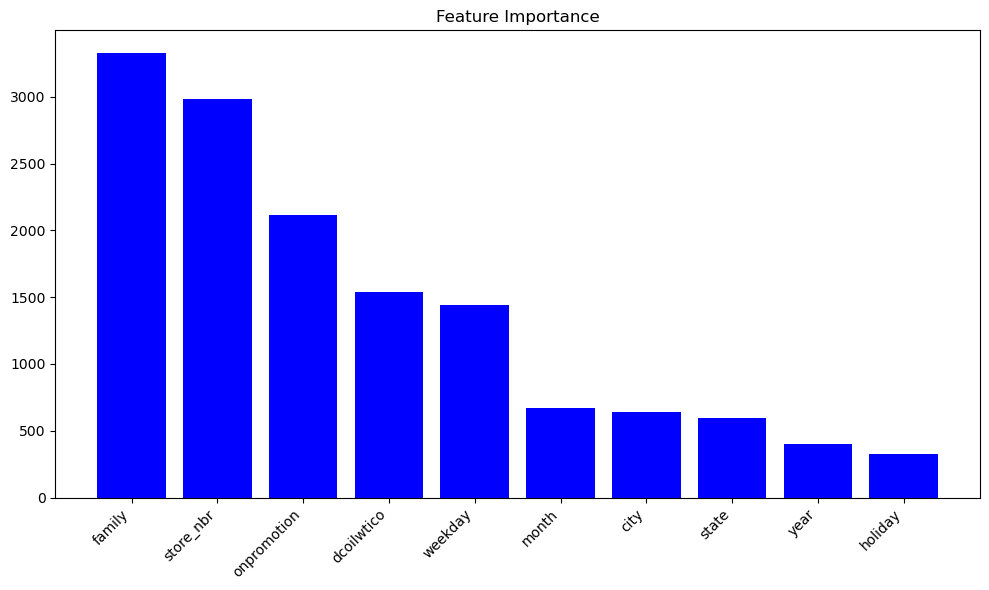

In [38]:
# 특성 중요도 계산
importance = best_model.feature_importances_

# 중요도를 기준으로 특성 인덱스 정렬
indices = np.argsort(importance)[::-1]

# 특성 이름 배열
features = X_train.columns

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(indices)), importance[indices], color='b', align='center')

# x축에 특성 이름 표시
plt.xticks(range(len(indices)), features[indices], rotation=45, ha='right')  # x축 그래프명을 45도로 회전하여 표시

# 그래프 출력
plt.tight_layout()
plt.show()

family, store_nbr, onpromotion이 sales에 큰 영향을 주므로, 기업의 데이터분석가로서 해당 변수에 타겟팅한 리스크관리 전략을 제시할 수 있다.